In [1]:
# import data
import pandas as pd
df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')


In [2]:
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1.shortnam.count()

163

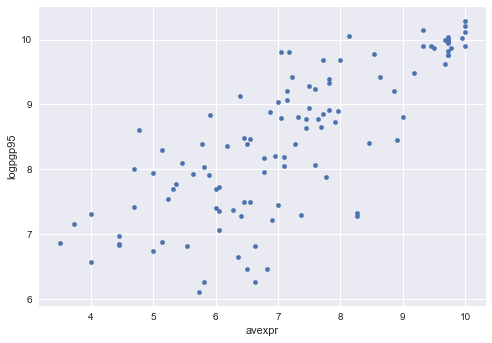

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()

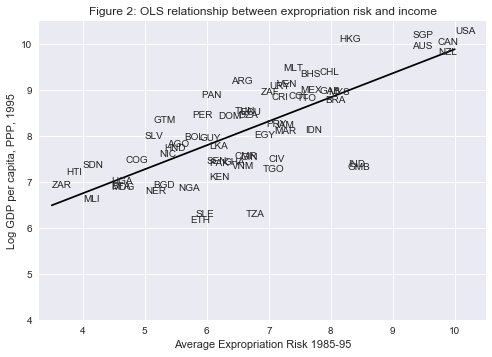

In [10]:
import numpy as np

# Dropping NA's is required to use numpy's polyfit
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])

# Use only 'base sample' for plotting purposes
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')

for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlim([3.3,10.5])
ax.set_ylim([4,10.5])
ax.set_xlabel('Average Expropriation Risk 1985-95')
ax.set_ylabel('Log GDP per capita, PPP, 1995')
ax.set_title('Figure 2: OLS relationship between expropriation risk and income')
plt.show()

In [11]:
df1['const'] = 1

In [12]:
import statsmodels.api as sm

reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [13]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [14]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           4.16e-24
Time:                        19:33:59   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

In [15]:
df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])

In [17]:
df1_plot.count()

shortnam    111
euro1900    109
excolony    110
avexpr      111
logpgp95    111
cons1        66
cons90       66
democ00a     65
cons00a      67
extmort4     70
logem4       70
loghjypl    102
baseco       64
const       111
dtype: int64

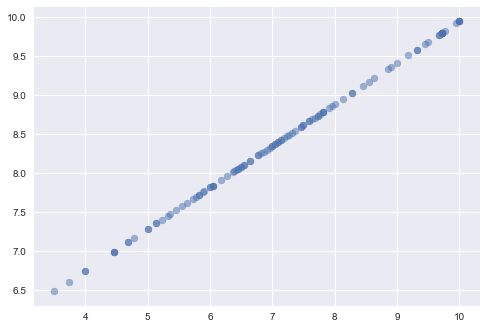

In [19]:
fix, ax = plt.subplots()
ax.scatter(df1_plot['avexpr'], results.predict(), alpha=0.5, label='predicted')

In [20]:
ax.scatter(df1_plot['avexpr'], df1_plot['logpgp95'], alpha=0.5, label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('avexpr')
ax.set_ylabel('logpgp95')
plt.show()

In [21]:
df2 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable2.dta')


In [22]:
df2.head()

,shortnam,africa,lat_abst,avexpr,logpgp95,other,asia,loghjypl,baseco
0,AFG,0.0,0.366667,NaN,NaN,0.0,1.0,NaN,NaN
1,AGO,1.0,0.136667,5.363636,7.770645,0.0,0.0,-3.411248,1.0
2,ARE,0.0,0.266667,7.181818,9.804219,0.0,1.0,NaN,NaN
3,ARG,0.0,0.377778,6.386364,9.133459,0.0,0.0,-0.872274,1.0
4,ARM,0.0,0.444444,NaN,7.682482,0.0,1.0,NaN,NaN


In [28]:
df2.isnull().sum(axis=0)

shortnam     0
africa       0
lat_abst     1
avexpr      42
logpgp95    15
other        0
asia         0
loghjypl    40
baseco      99
dtype: int64

In [31]:
df2['cons'] =1
x1= ['cons', 'lat_abst']

In [33]:
import statsmodels.api as sm

In [37]:
reg1 = sm.OLS(df2['logpgp95'], df2[x1], missing='drop').fit()

In [40]:
X1 = ['cons', 'avexpr']
X2 = ['cons', 'avexpr', 'lat_abst']
X3 = ['cons', 'avexpr', 'lat_abst', 'asia', 'africa', 'other']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df2['logpgp95'], df2[X1], missing='drop').fit()
reg2 = sm.OLS(df2['logpgp95'], df2[X2], missing='drop').fit()
reg3 = sm.OLS(df2['logpgp95'], df2[X3], missing='drop').fit()

In [41]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[reg1,reg2,reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'avexpr',
                                             'lat_abst',
                                             'asia',
                                             'africa'])

results_table.add_title('Table 2 - OLS Regressions')

print(results_table)


        Table 2 - OLS Regressions
                 Model 1 Model 3 Model 4 
-----------------------------------------
avexpr           0.53*** 0.46*** 0.39*** 
                 (0.04)  (0.06)  (0.05)  
lat_abst                 0.87*   0.33    
                         (0.49)  (0.45)  
asia                             -0.15   
                                 (0.15)  
africa                           -0.92***
                                 (0.17)  
cons             4.63*** 4.87*** 5.85*** 
                 (0.30)  (0.33)  (0.34)  
other                            0.30    
                                 (0.37)  
R-squared        0.61    0.62    0.72    
No. observations 111     111     111     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


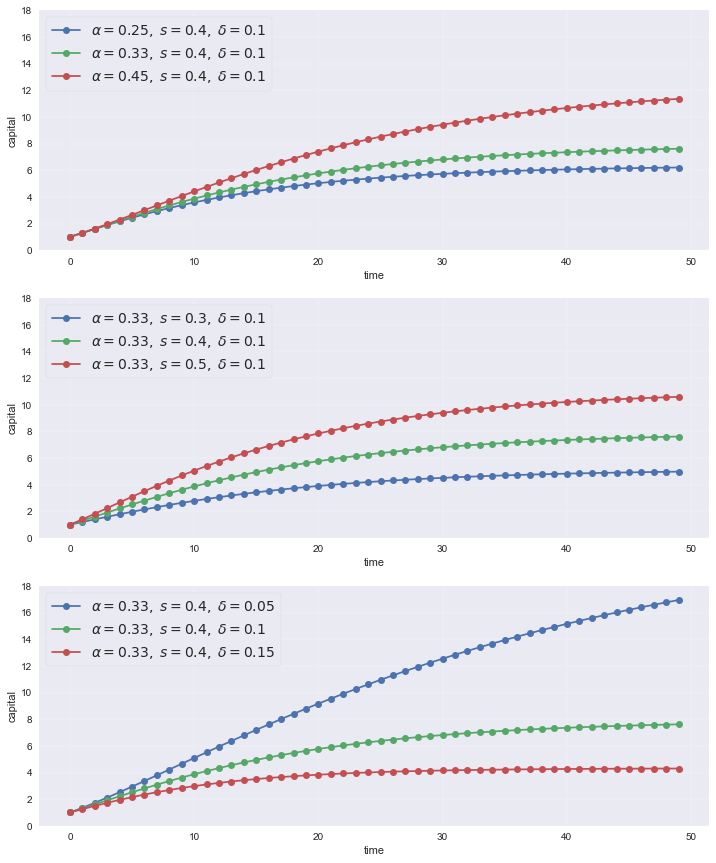

In [42]:
from itertools import product

def plot_path(ax, αs, s_vals, δs, series_length=50):
    """
    Add a time series plot to the axes ax for all given parameters.
    """
    k = np.empty(series_length)

    for (α, s, δ) in product(αs, s_vals, δs):
        k[0] = 1
        for t in range(series_length-1):
            k[t+1] = s * k[t]**α + (1 - δ) * k[t]
        ax.plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta = {δ}$")

    ax.grid(lw=0.2)
    ax.set_xlabel('time')
    ax.set_ylabel('capital')
    ax.set_ylim(0, 18)
    ax.legend(loc='upper left', frameon=True, fontsize=14)

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Parameters (αs, s_vals, δs)
set_one = ([0.25, 0.33, 0.45], [0.4], [0.1])
set_two = ([0.33], [0.3, 0.4, 0.5], [0.1])
set_three = ([0.33], [0.4], [0.05, 0.1, 0.15])

for (ax, params) in zip(axes, (set_one, set_two, set_three)):
    αs, s_vals, δs = params
    plot_path(ax, αs, s_vals, δs)

plt.show()

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [44]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -0.314521
1    0.699902
2    0.753456
3    0.652365
Name: daily returns, dtype: float64

In [46]:
np.abs(s)

0    0.314521
1    0.699902
2    0.753456
3    0.652365
Name: daily returns, dtype: float64

In [47]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -0.314521
AAPL    0.699902
MSFT    0.753456
GOOG    0.652365
Name: daily returns, dtype: float64

In [48]:
s['AMZN']

-0.31452097824878006

In [50]:
'AAPL' in s

True

In [51]:
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [53]:
df.head()

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [57]:
df[:-1]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454


In [60]:
df.iloc[0:3, 1:2]

,country isocode
0,ARG
1,AUS
2,IND


In [61]:
df.loc[df.index[2:5], 'country']

2     India
3    Israel
4    Malawi
Name: country, dtype: object

In [62]:
df = df[['country', 'POP', 'tcgdp']]

In [63]:
df =df.set_index('country')

In [64]:
df.head()

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03


In [65]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [66]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [68]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


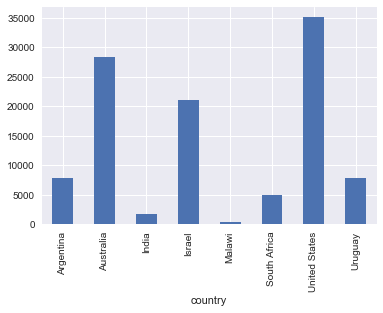

In [69]:
df['GDP percap'].plot(kind ='bar')
plt.show()

In [70]:
# how to pull data from Fred data base

r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')


In [71]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [72]:
source[1]

'1948-01-01,3.4\r'

In [73]:
data = pd.read_csv(url, index_col=0, parse_dates=True)


In [74]:
type(data)

pandas.core.frame.DataFrame

In [75]:
data.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [76]:
data.describe()

,VALUE
count,859.000000
mean,5.746566
std,1.641847
min,2.500000
25%,4.500000
50%,5.600000
75%,6.800000
max,10.800000


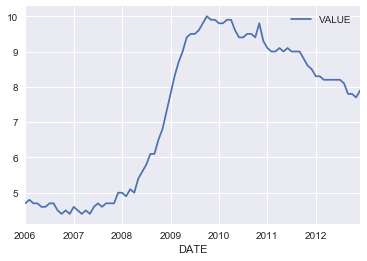

In [77]:
data['2006':'2012'].plot()

In [78]:
ticker = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/ticker_data.csv')


In [79]:
ticker.head()

,Date,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
0,2013-01-02,21.379999,27.620001,196.350006,79.930000,95.989998,549.029976,257.309998,77.070000,64.750000,37.599998,723.251230,11.51,145.789993
1,2013-01-03,21.320000,27.250000,195.270004,79.029999,95.370003,542.099991,258.480011,77.470001,64.449997,37.599998,723.671256,11.49,145.800003
2,2013-01-04,21.160000,26.740000,193.990005,79.400002,97.339996,526.999992,259.149994,77.690002,63.500000,37.660000,737.971262,11.14,145.649994
3,2013-01-07,21.250000,26.690001,193.139999,79.680000,95.529999,523.900002,268.459991,76.129997,64.010002,37.299999,734.751286,10.97,142.919998
4,2013-01-08,21.090000,26.549999,192.869995,78.529999,93.930000,525.310020,266.380005,74.129997,63.910000,37.040001,733.301227,10.72,141.279999


In [80]:
ticker.set_index('Date', inplace=True)


In [81]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [82]:
price_change = pd.Series()


In [83]:
for tick in ticker_list:
    change = 100 * (ticker.loc[ticker.index[-1], tick] - ticker.loc[ticker.index[0], tick])
    / ticker.loc[ticker.index[0], tick]
    name = ticker_list[tick]
    price_change[name] = change

In [88]:
print(price_change)

PetroChina   -24.727345
BHP          -14.675345
IBM           -4.471606
Apple          2.183855
Coca-Cola      9.867030
Qualcomm      14.671815
Intel         21.421891
Toyota        27.013231
Microsoft     35.445325
Sony          50.217211
Google        54.954725
Amazon        54.984265
Boeing        77.098748
dtype: float64


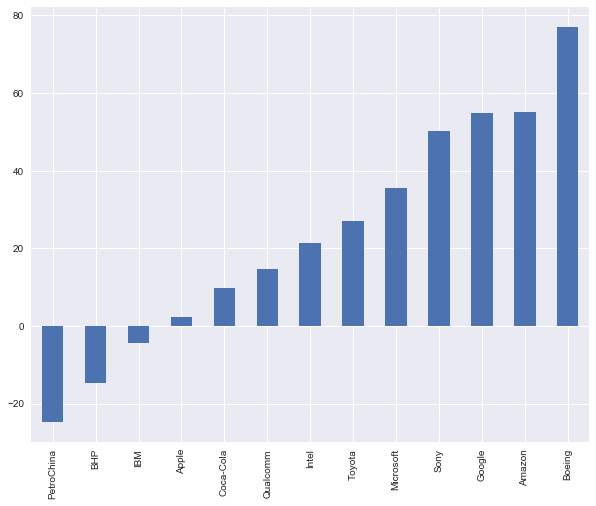

In [85]:
price_change.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
price_change.plot(kind='bar', ax=ax)
plt.show()